In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # for vizualization
from matplotlib.pyplot import figure # for figuresize

In [4]:
voice_data = pd.read_csv("voice.csv")

In [5]:
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
voice_data.label = [1 if each == "male" else 0 for each in voice_data.label]
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [7]:
Y_data = voice_data.label.values
X_data = voice_data.drop(["label"], axis = 1)
X_data = (X_data - X_data.min())/(X_data.max() - X_data.min()) # normalization

In [8]:
print(voice_data.shape)
print(X_data.shape)
print(Y_data.shape)

(3168, 21)
(3168, 20)
(3168,)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, Y_data, test_size = 0.3, random_state = 42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [10]:
x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 2217)
(1, 2217)
(20, 951)
(1, 951)


In [12]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    
    parameters = {"W1": np.random.randn(2,x_train.shape[0]) * 0.1,
                  "b1": np.zeros((2,1)),
                  "W2": np.random.randn(2,2) * 0.1,
                  "b2": np.zeros((2,1)),
                  "W3": np.random.randn(1,2) * 0.1,
                  "b3": np.zeros((1,1))}
    
    return parameters

parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

In [13]:
print(parameters["W1"].shape)
print(parameters["W2"].shape)
print(parameters["W3"].shape)

(2, 20)
(2, 2)
(1, 2)


In [14]:
print(parameters["b1"].shape)
print(parameters["b2"].shape)
print(parameters["b3"].shape)

(2, 1)
(2, 1)
(1, 1)


In [15]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [17]:
def forward_propagation_NN(x_train, parameters):
    
    Z1 = np.dot(parameters["W1"],x_train) + parameters["b1"]
    A1 = np.tanh(Z1) # tanh is used as activation function 1
    Z2 = np.dot(parameters["W2"],A1) + parameters["b2"]
    A2 = np.tanh(Z2) # tanh is used as activation function 2
    Z3 = np.dot(parameters["W3"],A2) + parameters["b3"]
    A3 = sigmoid(Z3)

    cache = {"Z1": Z1,
             "A1": A1,
             "W1": parameters["W1"],
             "Z2": Z2,
             "A2": A2,
             "W2": parameters["W2"],
             "Z3": Z3,
             "A3": A3,
             "W3": parameters["W3"]}
    
    return A3, cache

A3, cache = forward_propagation_NN(x_train, parameters)

In [18]:
def compute_cost_NN(A3, Y, parameters):
    
    logprobs = np.multiply(np.log(A3),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    
    return cost

cost = compute_cost_NN(A3, y_train, parameters)

In [19]:
def backward_propagation_NN(parameters, cache, X, Y):
    
    dimension = X.shape[0] # it is 20 for our case
    dZ3 = cache["A3"] - Y # d(cost)/d(Z3)
    dW3 = 1/dimension * np.dot(dZ3,cache["A2"].T) # d(cost)/d(W3)
    db3 = 1/dimension * np.sum(dZ3, axis=1, keepdims=True) # d(cost)/d(b3)
    dZ2 = np.multiply(np.dot(dZ3.T, cache["W3"]).T , 1-np.power(cache["A2"],2)) # d(cost)/d(Z2)
    dW2 = 1/dimension * np.dot(cache["A1"], dZ2.T) # d(cost)/d(W2)
    db2 = 1/dimension * np.sum(dZ2, axis=1, keepdims=True) # d(cost)/d(b2)
    dZ1 = np.multiply(np.dot(dZ2.T, cache["W2"].T).T,1-np.power(cache["A1"],2)) # d(cost)/d(Z1)
    dW1 = 1/dimension * np.dot(dZ1, X.T) # d(cost)/d(W1)
    db1 = 1/dimension * np.sum(dZ1,axis=1, keepdims=True) # d(cost)/d(b1)
    grads = {'dW3':dW3, 
             'db3':db3,
             'dW2':dW2,
             'db2':db2,
             'dW1':dW1,
             'db1':db1}
    
    return grads

grads = backward_propagation_NN(parameters, cache, x_train, y_train)

In [20]:
Learning_Rate = 0.01

In [21]:
def update_parameters_NN(parameters, grads, learning_rate = Learning_Rate):
    parameters = {"W1": parameters["W1"]-learning_rate*grads["dW1"],
                  "b1": parameters["b1"]-learning_rate*grads["db1"],
                  "W2": parameters["W2"]-learning_rate*grads["dW2"],
                  "b2": parameters["b2"]-learning_rate*grads["db2"],
                  "W3": parameters["W3"]-learning_rate*grads["dW3"],
                  "b3": parameters["b3"]-learning_rate*grads["db3"]}
    
    return parameters

parameters = update_parameters_NN(parameters, grads, learning_rate = Learning_Rate)

In [22]:
def predict_NN(parameters,x_test):
    # x_test is the input for forward propagation
    A3, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(A3.shape[1]):
        if A3[0,i]<= 0.5: # if smaller than 0.5, predict it as 0
            Y_prediction[0,i] = 0
        else: # if greater than 0.5, predict it as 1
            Y_prediction[0,i] = 1

    return Y_prediction

Y_prediction = predict_NN(parameters,x_test)

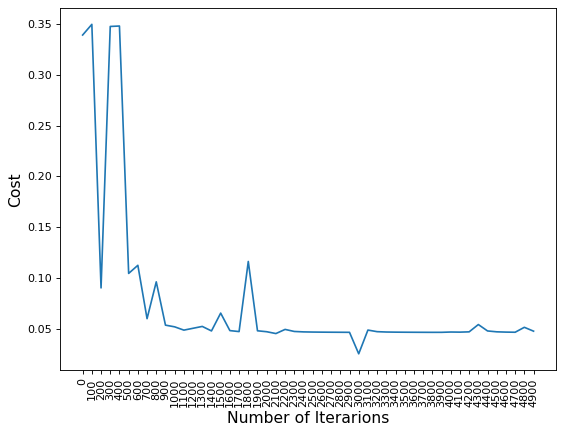

train accuracy: %98.151
test accuracy: %97.266


In [23]:
def three_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        # forward propagation
        A3, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A3, y_train, parameters)
        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0: # to visualize data in each 100 iteration
            cost_list.append(cost)
            index_list.append(i)

    figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarions", fontsize = 14)
    plt.ylabel("Cost", fontsize = 14)
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Accuracies
    print("train accuracy: %{}".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,3)))
    print("test accuracy: %{}".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,3)))
    return parameters

parameters = three_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=5000)